In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/nfs/homes/sseyler/Projects/PathwayAnalysis/Phase1/analysis')

### Get coordinates of AdK reference structure

In [2]:
import MDAnalysis
import numpy as np
import os

prot = 'adk'
co = True

workstation = '/nfs/homes/sseyler'

pf = workstation + '/Simulations/' # workstation
if prot == 'adk':
    # Setup - don't change unless needed
    ref_fp = '%s/%s/coords/core_norm' % (pf, prot)

    ref_fp1AKE = '%s/1ake_a_ca_core.pdb' % ref_fp
    ref_fp4AKE = '%s/4ake_a_ca_core.pdb' % ref_fp

    ref1AKE = MDAnalysis.Universe(ref_fp1AKE)
    ref4AKE = MDAnalysis.Universe(ref_fp4AKE)
    u_ref = MDAnalysis.Universe(ref_fp1AKE)

    ref1AKE_ca = ref1AKE.selectAtoms('name CA')
    ref4AKE_ca = ref4AKE.selectAtoms('name CA')

    COREstr = "resid 1:29 or resid 60:121 or resid 160:214"
    ref1akeCORE_ca = ref1AKE_ca.selectAtoms(COREstr).coordinates() \
            - ref1AKE_ca.selectAtoms(COREstr).centerOfMass()
    ref4akeCORE_ca = ref4AKE_ca.selectAtoms(COREstr).coordinates() \
            - ref4AKE_ca.selectAtoms(COREstr).centerOfMass()
    ref_struct = 0.5*(ref1akeCORE_ca + ref4akeCORE_ca)

In [3]:
u_ref.atoms.translate(-ref1AKE_ca.selectAtoms(COREstr).centerOfMass())
ref4AKE.atoms.translate(-ref4AKE_ca.selectAtoms(COREstr).centerOfMass())
u_ref.selectAtoms(COREstr).CA.set_positions(ref_struct)

### Get filepaths of trajectories

In [16]:
dimsdir = workstation + '/Simulations/adk/charmm/dims/implicit/trj/co/'
top_dims = workstation + '/Simulations/adk/charmm/dims/implicit/top/adk4ake.psf'
dims_tr = []
for i in xrange(1, 4):
    name = 'dims%04i.dcd' % i
    dims_tr.append(dimsdir + name)

frodadir = workstation + '/Simulations/adk/gp'
top_froda = frodadir + '/top/1ake.pdb'
froda_tr = []
for i in xrange(1, 4):
    name = '/trj/co/pathway%i.dcd' % i
    froda_tr.append(frodadir + name)

############################
# Interpolating line between 1ake and 4ake:
############################
steps = 100
t = np.linspace(0,1,steps)
ref4akecoords = ref4AKE_ca.atoms.coordinates() - ref4AKE_ca.atoms.centerOfMass()
ref1akecoords = ref1AKE_ca.atoms.coordinates() - ref1AKE_ca.atoms.centerOfMass()
v = ref4akecoords - ref1akecoords
interp_line1 = ref1akecoords + np.outer(t,v).reshape(steps,214,3)

import coord2traj as c2t
atoms = ['CA' for _ in xrange(214)]
converter = c2t.Coord2Traj(ref_fp1AKE, interp_line1, atoms, formats=['dcd'],
                           filename='adk_co-interp')
converter.convert()
intp_tr = []
intp_tr.append('adk_co-interp.dcd')
############################

basedir = workstation + '/Simulations/adk/public_servers'

map_tr = []
map_tr.append(basedir + '/map/co/001/pathway_ca.pdb')
map_tr.append(basedir + '/map/co/002/pathway_ca.pdb')
map_tr.append(basedir + '/map/co/003/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/004/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/005/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/006/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/007/pathway_ca.pdb')
# # map_tr.append(basedir + '/map/co/008/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/009/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/010/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/011/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/012/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/013/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/014/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/015/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/016/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/017/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/018/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/019/pathway_ca.pdb')
# map_tr.append(basedir + '/map/co/020/pathway_ca.pdb')
anm_tr = []
anm_tr.append(basedir + '/anmp/co/001/pathway_ca.pdb')
anm_tr.append(basedir + '/anmp/co/002/pathway_ca.pdb')
anm_tr.append(basedir + '/anmp/co/003/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/004/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/005/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/006/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/007/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/008/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/009/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/010/pathway_ca.pdb')
# anm_tr.append(basedir + '/anmp/co/011/pathway_ca.pdb')
ienm_tr = []
ienm_tr.append(basedir + '/ienm/co/001/pathway_ca.pdb')
ienm_tr.append(basedir + '/ienm/co/002/pathway_ca.pdb')
ienm_tr.append(basedir + '/ienm/co/003/pathway_ca.pdb')
menm_tr = []
menm_tr.append(basedir + '/menm/co/001/pathway_ca_sp.pdb')
menm_tr.append(basedir + '/menm/co/002/pathway_ca_sp.pdb')
menm_tr.append(basedir + '/menm/co/003/pathway_ca_sp.pdb')
menm_tr.append(basedir + '/menm/co/001/pathway_ca_sd.pdb')
menm_tr.append(basedir + '/menm/co/002/pathway_ca_sd.pdb')
menm_tr.append(basedir + '/menm/co/003/pathway_ca_sd.pdb')
mddmd_tr = []
mddmd_tr.append(basedir + '/mddmd/co/001/pathway_red.pdb')
mddmd_tr.append(basedir + '/mddmd/co/002/pathway_red.pdb')
mddmd_tr.append(basedir + '/mddmd/co/003/pathway_red.pdb')
godmd_tr = []
godmd_tr.append(basedir + '/godmd/co/001/pathway_ca.pdb')
godmd_tr.append(basedir + '/godmd/co/002/pathway_ca.pdb')
godmd_tr.append(basedir + '/godmd/co/003/pathway_ca.pdb')
yms_tr = []
yms_tr.append(basedir + '/yms/co/001/pathway_ca.pdb')
yms_tr.append(basedir + '/yms/co/002/pathway_ca.pdb')
yms_tr.append(basedir + '/yms/co/003/pathway_ca.pdb')
# yms_tr.append(basedir + '/yms/co/004/pathway_ca.pdb')

Fitted frame   100/100  [100.0%]
Finished trajectory conversion.

In [34]:
import pdbtrajconverter as ptc
import os.path

top_trj_newlist = []
trjlist = map_tr + ienm_tr + menm_tr + mddmd_tr + godmd_tr + yms_tr + anm_tr
for i, filepath in enumerate(trjlist):
    head, tail = os.path.split(filepath)
    top = head + '/top_conv.pdb'
    if True: #not os.path.isfile(top):
        print "Converting %s to DCD format..." % filepath
        u = MDAnalysis.Universe(filepath, multiframe=True)
        converter = ptc.PDBToBinaryTraj(u, targetdir=head)
        (top, traj) = converter.convert()
    else:
        traj = head + '/trj_conv.dcd'
    top_trj_newlist.append((top, traj))

# Append interp topology/trajectory (from dcd file) pair
top_trj_newlist.append((ref_fp1AKE, intp_tr[0]))

Converting /nfs/homes/sseyler/Simulations/adk/public_servers/map/co/001/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/map/co/002/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/map/co/003/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/ienm/co/001/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/ienm/co/002/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/ienm/co/003/pathway_ca.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/menm/co/001/pathway_ca_sp.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/menm/co/002/pathway_ca_sp.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/public_servers/menm/co/003/pathway_ca_sp.pdb to DCD format...
Converting /nfs/homes/sseyler/Simulations/adk/pub

### Construct MDAnalysis Universes from trajectories

In [35]:
universes = []

In [36]:
for trj in dims_tr:
    u = MDAnalysis.Universe(top_dims, trj)
    universes.append(u)
for trj in froda_tr:
    u = MDAnalysis.Universe(top_froda, trj)
    universes.append(u)

In [37]:
for top_trj in top_trj_newlist:
    u = MDAnalysis.Universe(*top_trj)
    universes.append(u)

In [46]:
labels = ['DIMS(1)', 'DIMS(2)', 'DIMS(3)','DIMS(4)', 'DIMS(5)', 'DIMS(6)',
          'DIMS(7)', 'DIMS(8)', 'DIMS(9)','DIMS(10)', 'DIMS(11)',
          'FRODA(1)', 'FRODA(2)', 'FRODA(3)','FRODA(4)', 'FRODA(5)', 'FRODA(6)',
          'FRODA(7)', 'FRODA(8)', 'FRODA(9)','FRODA(10)', 'FRODA(11)',
          'MAP(1)', 'MAP(2)', 'MAP(3)', 'MAP(4)', 'MAP(5)', 'MAP(6)', 'MAP(7)', 'MAP(9)',
          'MAP(10)','MAP(11)','MAP(12)', #'MAP(13)','MAP(14)','MAP(15)','MAP(16)','MAP(17)',
          #'MAP(18)','MAP(19)','MAP(20)',
          'iENM(1)', 'iENM(2)', 'iENM(3)',
          'MENM-SP(1)', 'MENM-SP(2)', 'MENM-SP(3)',
          'MENM-SD(1)', 'MENM-SD(2)', 'MENM-SD(3)',
          'MDdMD(1)',  'MDdMD(2)', 'MDdMD(3)',
          'GOdMD(1)', 'GOdMD(2)', 'GOdMD(3)',
          'Morph(1)', 'Morph(2)', 'Morph(3)',
          'ANMP(1)', 'ANMP(2)', 'ANMP(3)','ANMP(4)', 'ANMP(5)', 'ANMP(6)',
          'ANMP(7)', 'ANMP(8)', 'ANMP(9)','ANMP(10)', 'ANMP(11)',
          'LinInt']

In [38]:
labels = ['DIMS(1)', 'DIMS(2)', 'DIMS(3)',
          'FRODA(1)', 'FRODA(2)', 'FRODA(3)',
          'MAP(1)', 'MAP(2)', 'MAP(3)',
          'iENM(1)', 'iENM(2)', 'iENM(3)',
          'MENM-SP(1)', 'MENM-SP(2)', 'MENM-SP(3)',
          'MENM-SD(1)', 'MENM-SD(2)', 'MENM-SD(3)',
          'MDdMD(1)',  'MDdMD(2)', 'MDdMD(3)',
          'GOdMD(1)', 'GOdMD(2)', 'GOdMD(3)',
          'Morph(1)', 'Morph(2)', 'Morph(3)',
          'ANMP(1)', 'ANMP(2)', 'ANMP(3)',
          'LinInt']

In [39]:
import psa

COREstr = "(resid 1:29 or resid 60:121 or resid 160:214)"
select_adk = 'name CA and ' + COREstr
psa_methods = psa.PSA(universes, reference=u_ref,
                      ref_select=select_adk,
                      path_select='name CA', labels=labels)

In [40]:
psa_methods.fit_paths(store=True)

/nfs/homes/sseyler/.local/lib/python2.7/site-packages/MDAnalysis/analysis/align.py:475: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  natoms, rot, weight)
Fitted frame   102/102  [100.0%]
Fitted frame    92/92  [100.0%]
Fitted frame    95/95  [100.0%]
Fitted frame   142/142  [100.0%]
Fitted frame   141/141  [100.0%]
Fitted frame   142/142  [100.0%]
Fitted frame   201/201  [100.0%]
Fitted frame   201/201  [100.0%]
Fitted frame   201/201  [100.0%]
Fitted frame    33/33  [100.0%]
Fitted frame    34/34  [100.0%]
Fitted frame    36/36  [100.0%]
Fitted frame    52/52  [100.0%]
Fitted frame    51/51  [100.0%]
Fitted frame    51/51  [100.0%]
Fitted frame    49/49  [100.0%]
Fitted frame    45/45  [100.0%]
Fitted frame    43/43  [100.0%]
Fitted frame    54/54  [100.0%]
Fitted frame    64/64  [100.0%]
Fitted frame    48/48  [100.0%]
Fitted frame    81/81  [100.0%]
Fitted frame   145/145  [100.0%]
Fitted frame   226/226  [100.0%]
Fitted frame 

# -----------------------------------------------------------------

## Scipy functions

In [41]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import cophenet, correspond, inconsistent, maxinconsts

## Plotting Frechet heat maps

In [42]:
psa_methods.run(metric='discrete_frechet')
df = psa_methods.D

### ----- Ward --------------------------------

True 0.778243530334
Incl zeros: 0.59 0.54
Excl zeros: 0.93 0.86


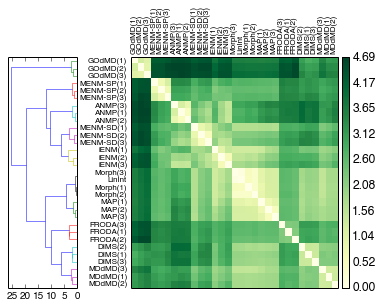

In [60]:
Z, dgram = psa_methods.plot(filename='plots/df_ward-test.svg', linkage='ward', figsize=4, labelsize=12,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
N_nonzero = np.count_nonzero(R[:,-1])
print "Incl zeros: %4.2f %4.2f" % (np.mean(maxc), np.mean(R[:,-1]))
print "Excl zeros: %4.2f %4.2f" % (np.sum(maxc)/N_nonzero, np.sum(R[:,-1])/N_nonzero)

### ----- Average --------------------------------

True 0.854775005728
Incl zeros: 0.58 0.54
Excl zeros: 0.91 0.85


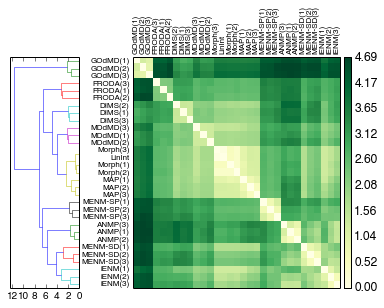

In [62]:
Z, dgram = psa_methods.plot(filename='plots/df_avg-test.svg', linkage='average', figsize=4, labelsize=12,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
N_nonzero = np.count_nonzero(R[:,-1])
print "Incl zeros: %4.2f %4.2f" % (np.mean(maxc), np.mean(R[:,-1]))
print "Excl zeros: %4.2f %4.2f" % (np.sum(maxc)/N_nonzero, np.sum(R[:,-1])/N_nonzero)
# print R

### ----- Weighted --------------------------------

True 0.856885497844
Incl zeros: 0.58 0.53
Excl zeros: 0.91 0.83


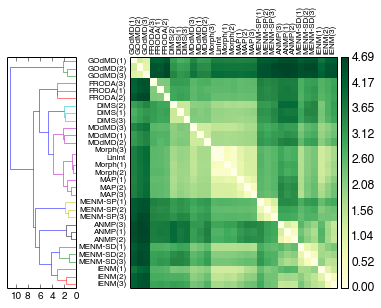

In [56]:
Z, dgram = psa_methods.plot(filename='plots/df_weighted-test.svg', linkage='weighted', figsize=4, labelsize=12,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
N_nonzero = np.count_nonzero(R[:,-1])
print "Incl zeros: %4.2f %4.2f" % (np.mean(maxc), np.mean(R[:,-1]))
print "Excl zeros: %4.2f %4.2f" % (np.sum(maxc)/N_nonzero, np.sum(R[:,-1])/N_nonzero)
# print R

### ----- Complete --------------------------------

True 0.823696435658
Incl zeros: 0.58 0.56
Excl zeros: 0.92 0.88


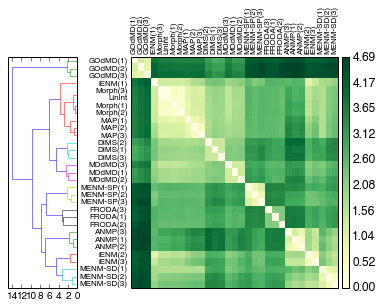

In [57]:
Z, dgram = psa_methods.plot(filename='plots/df_complete-test.svg', linkage='complete', figsize=4, labelsize=12,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
N_nonzero = np.count_nonzero(R[:,-1])
print "Incl zeros: %4.2f %4.2f" % (np.mean(maxc), np.mean(R[:,-1]))
print "Excl zeros: %4.2f %4.2f" % (np.sum(maxc)/N_nonzero, np.sum(R[:,-1])/N_nonzero)
# print R

### ----- Single --------------------------------

True 0.849014408594
Incl zeros: 0.50 0.47
Excl zeros: 0.80 0.75


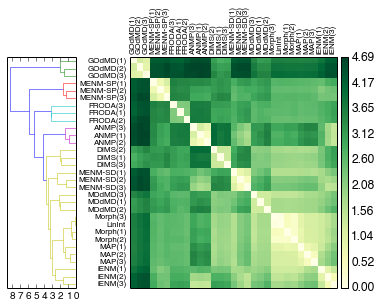

In [58]:
Z, dgram = psa_methods.plot(filename='plots/df_single-test.svg', linkage='single', figsize=4, labelsize=12,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
N_nonzero = np.count_nonzero(R[:,-1])
print "Incl zeros: %4.2f %4.2f" % (np.mean(maxc), np.mean(R[:,-1]))
print "Excl zeros: %4.2f %4.2f" % (np.sum(maxc)/N_nonzero, np.sum(R[:,-1])/N_nonzero)
# print R

# -----------------------------------------------------------------

## Plotting Hausdorff heat map (Ward only)

In [50]:
psa_methods.run(metric='hausdorff')
dh = psa_methods.D

True 0.708019588726
0.603873890865 0.569479983823


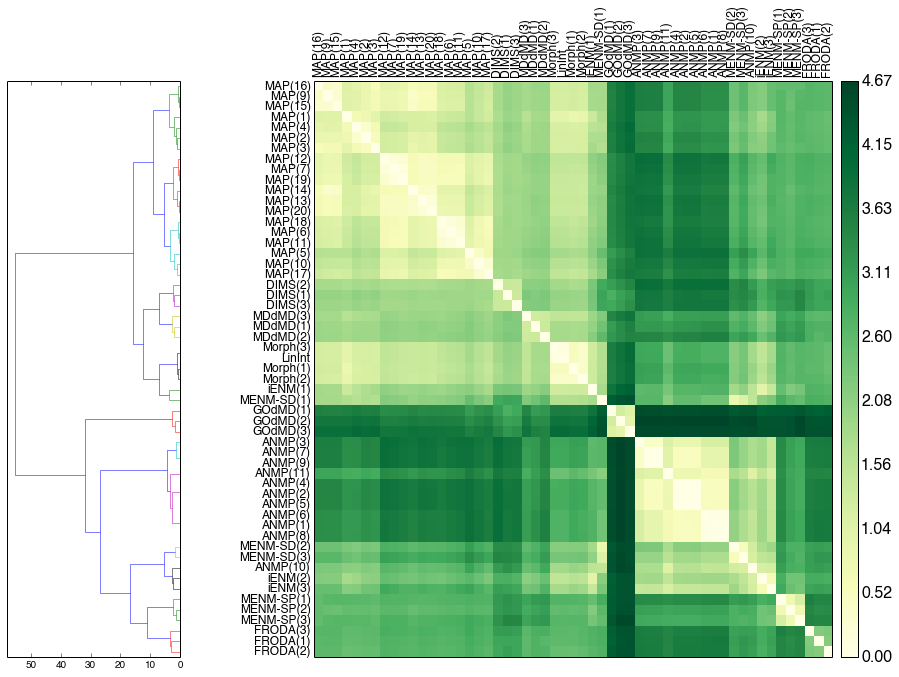

In [33]:
Z, dgram = psa_methods.plot(filename='plots/dh_ward-test2.svg', linkage='ward', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.87460948861
0.608648135754 0.568244584535


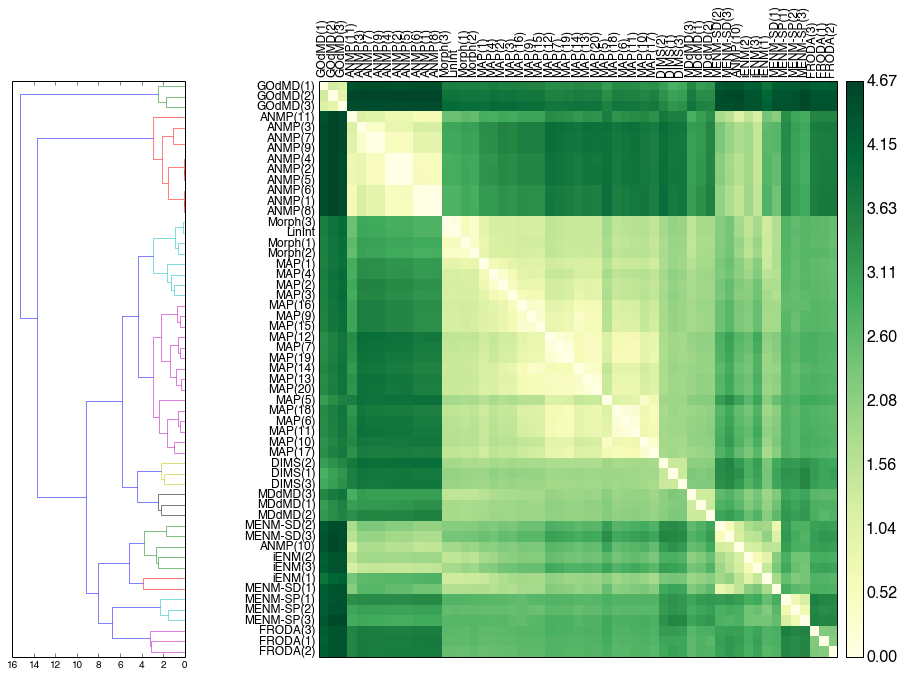

In [35]:
Z, dgram = psa_methods.plot(filename='plots/dh_average-test2.svg', linkage='average', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.888619660358
0.608348846561 0.567022180697


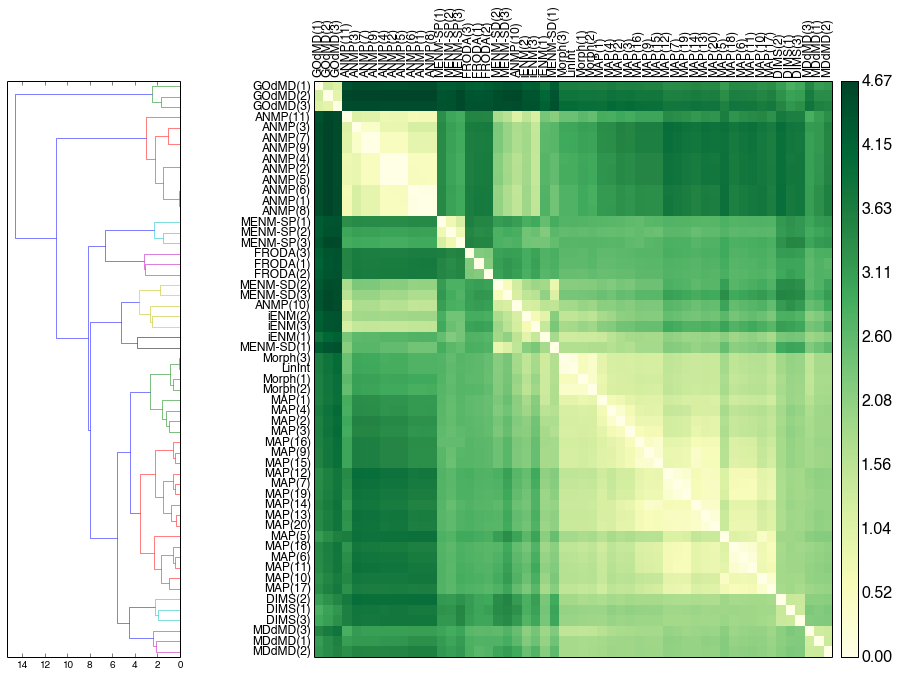

In [34]:
Z, dgram = psa_methods.plot(filename='plots/dh_weighted-test2.svg', linkage='weighted', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.786406019544
0.60019313391 0.560758455362


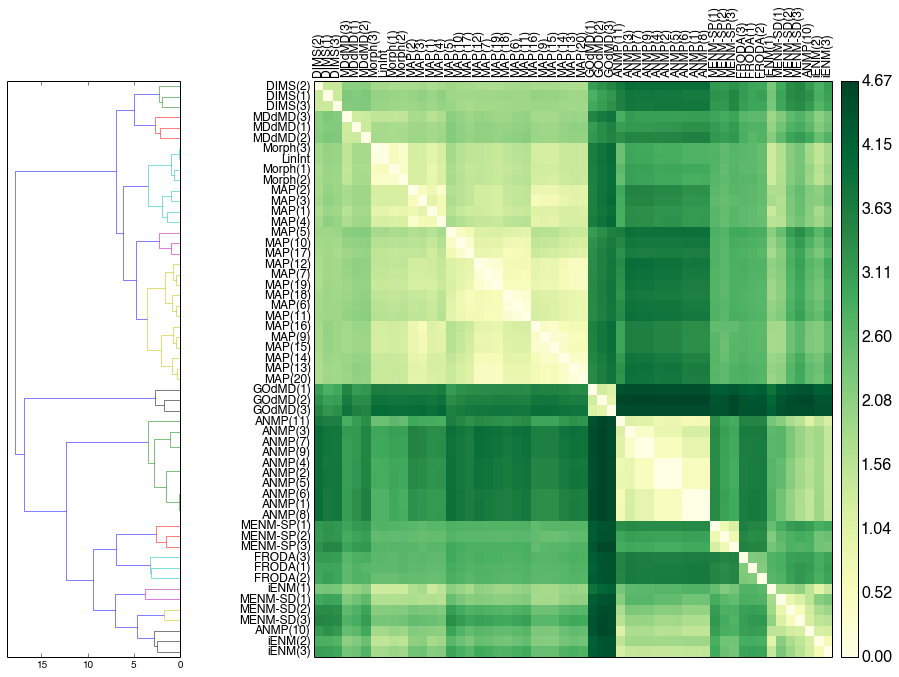

In [36]:
Z, dgram = psa_methods.plot(filename='plots/dh_complete-test2.svg', linkage='complete', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.777995305354
0.576715571879 0.518175587294


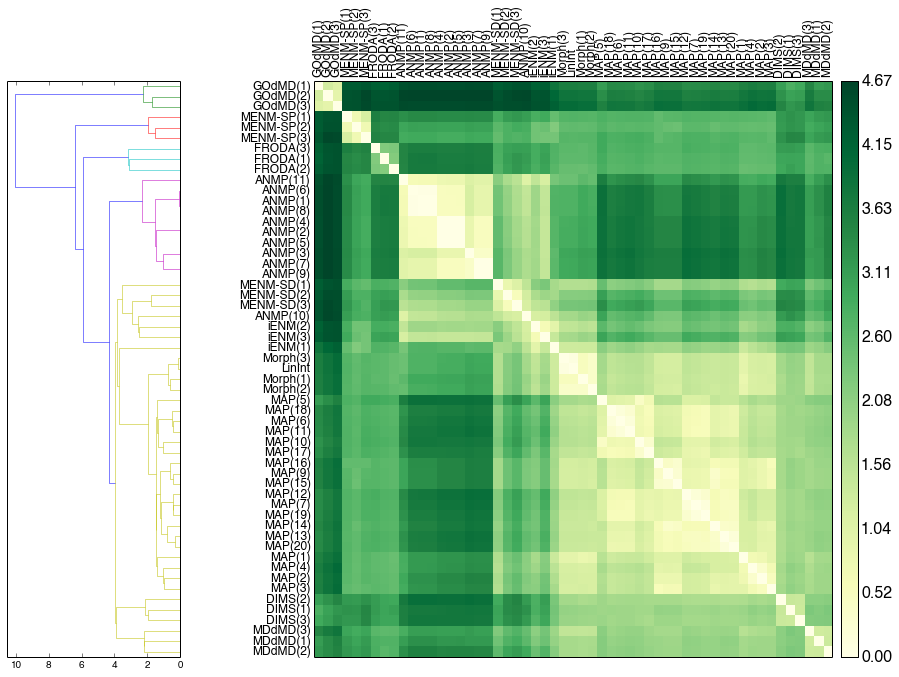

In [37]:
Z, dgram = psa_methods.plot(filename='plots/dh_single-test2.svg', linkage='single', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

# -----------------------------------------------------------------

# Clustering with 11 DIMS, 11 FRODA, 11 ANMP, 19 MAP

True 0.711536155163
0.597344281047 0.545051187547


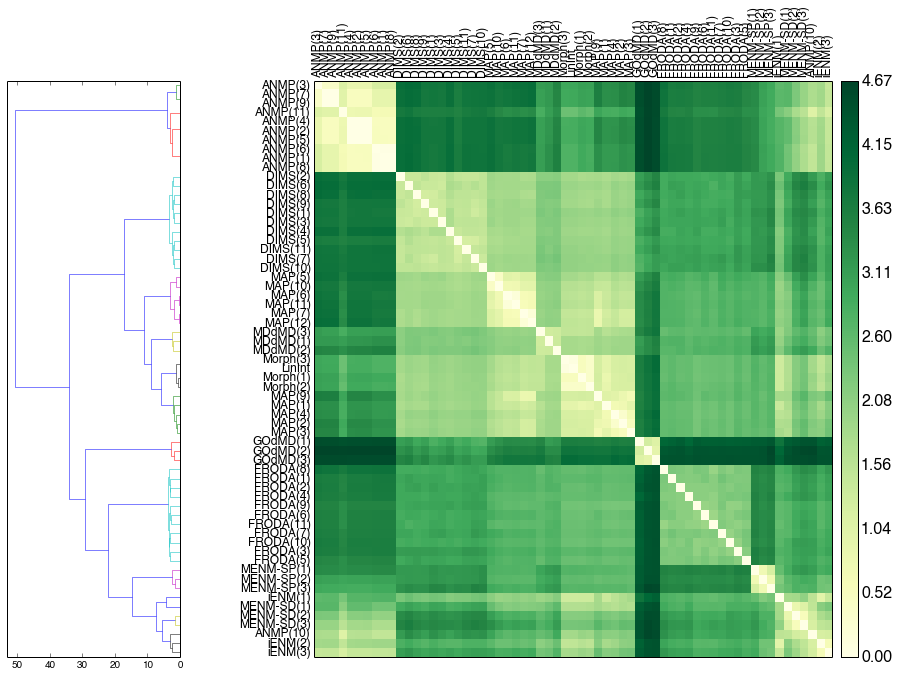

In [52]:
Z, dgram = psa_methods.plot(filename='plots/dh_ward-test3.svg', linkage='ward', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.835828355145
0.611187690747 0.553474653301


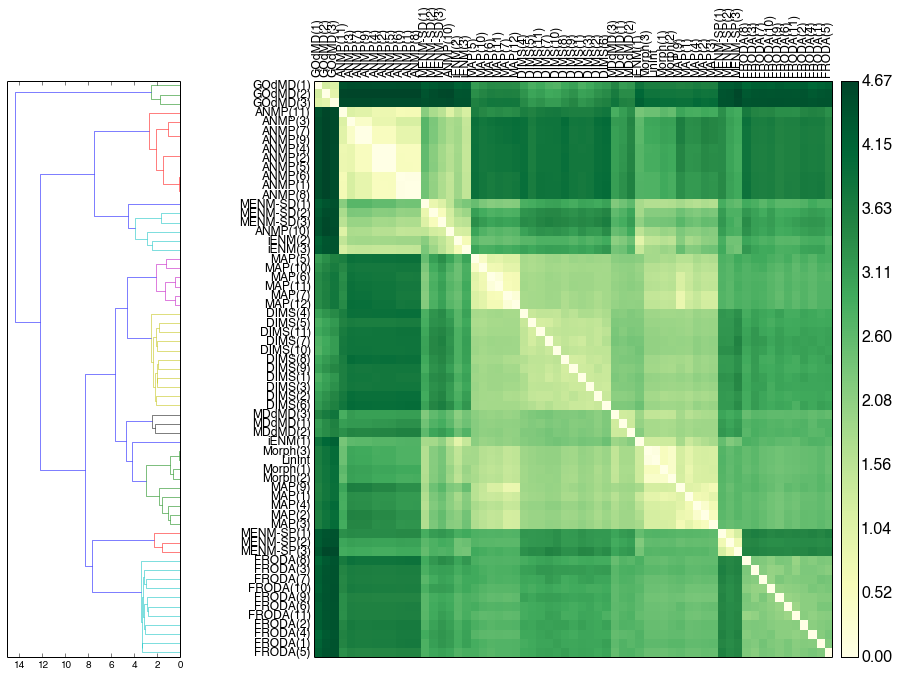

In [53]:
Z, dgram = psa_methods.plot(filename='plots/dh_average-test3.svg', linkage='average', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.847656631533
0.612204372045 0.558789846945


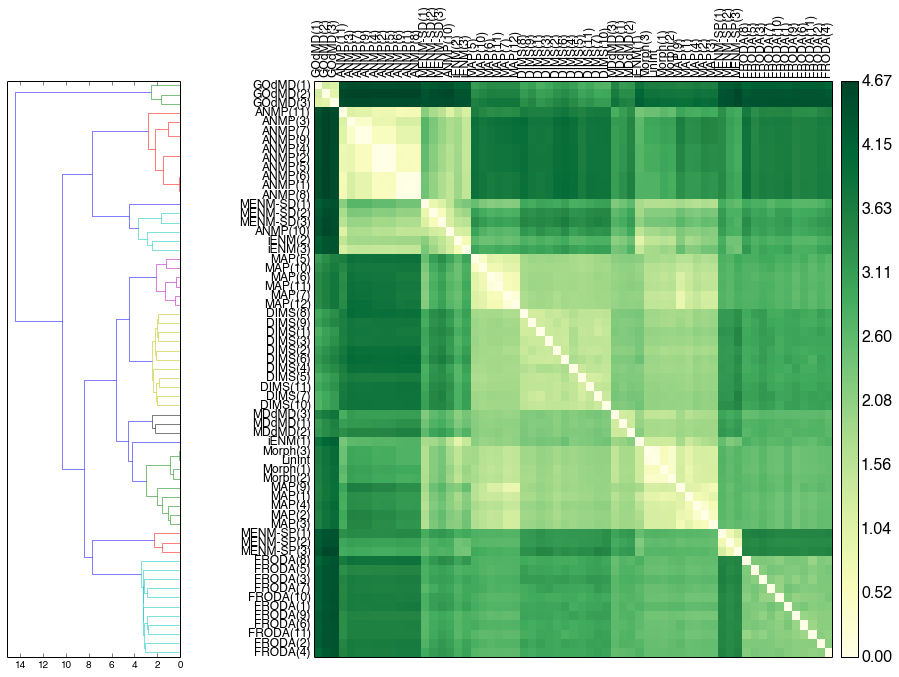

In [54]:
Z, dgram = psa_methods.plot(filename='plots/dh_weighted-test3.svg', linkage='weighted', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.796489939264
0.601323542419 0.561805912398


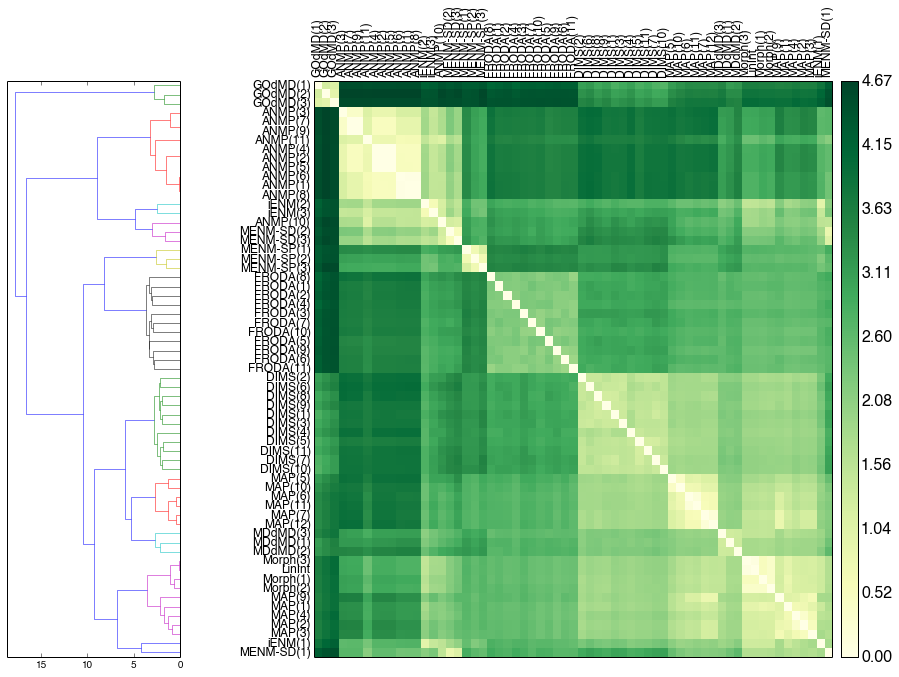

In [55]:
Z, dgram = psa_methods.plot(filename='plots/dh_complete-test3.svg', linkage='complete', figsize=10, labelsize=16,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

# -----------------------------------------------------------------

# -----------------------------------------------------------------

True 0.674123700372
0.582610179761 0.548497413706


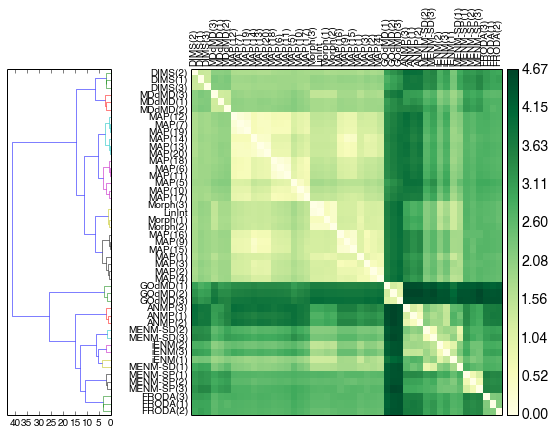

In [17]:
Z, dgram = psa_methods.plot(filename='plots/dh_ward-test.svg', linkage='ward', figsize=6, labelsize=14,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.753746387468
0.591694179951 0.559870681803


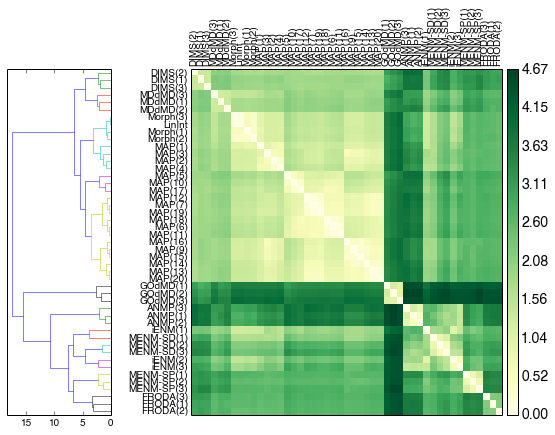

In [18]:
Z, dgram = psa_methods.plot(filename='plots/dh_complete-test.svg', linkage='complete', figsize=6, labelsize=14,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.8776078898
0.590842124861 0.552130881005


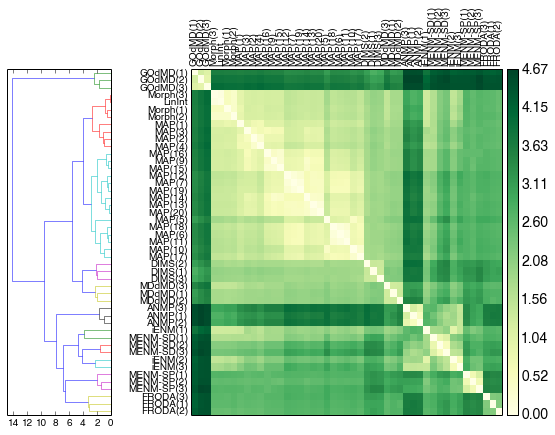

In [19]:
Z, dgram = psa_methods.plot(filename='plots/dh_average-test.svg', linkage='average', figsize=6, labelsize=14,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.909026932734
0.591473449593 0.544243468401


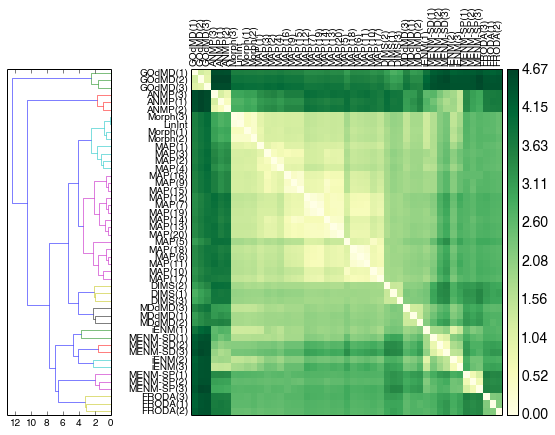

In [20]:
Z, dgram = psa_methods.plot(filename='plots/dh_weighted-test.svg', linkage='weighted', figsize=6, labelsize=14,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

True 0.868028414404
0.586477391257 0.499356139041


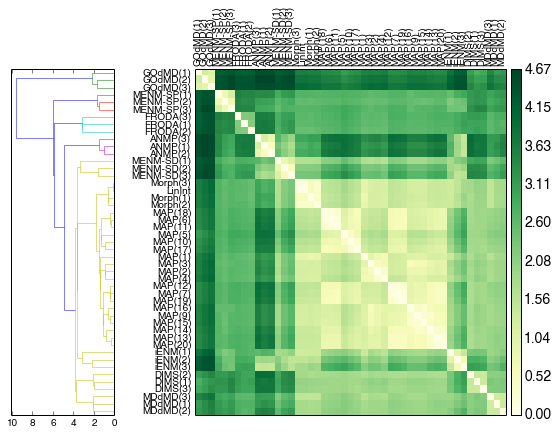

In [21]:
Z, dgram = psa_methods.plot(filename='plots/dh_single-test.svg', linkage='single', figsize=6, labelsize=14,
                            distance_sort=False, count_sort=False)
Y = squareform(psa_methods.D)
c, d = cophenet(Z, Y)
cor = correspond(Z, Y)
R = inconsistent(Z)
maxc = maxinconsts(Z, R)
print cor, c
print np.mean(maxc), np.mean(R[:,-1])

# ==============================================================

In [16]:
vdf = squareform(df)
vdh = squareform(dh)

In [55]:
np.max(np.abs(df-dh))

0.19468261273415344

In [17]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from pylab import cm, savefig

In [18]:
color = sns.color_palette()
color_set1 = sns.color_palette("Set1", 9)
color_set2 = sns.color_palette("Set2", 8)

In [19]:
datalen = len(vdf)
dframe = pd.DataFrame()
d = {'Discrete Fréchet' : vdf,
     'Hausdorff' : vdh}
dframe = dframe.append(pd.DataFrame(d))

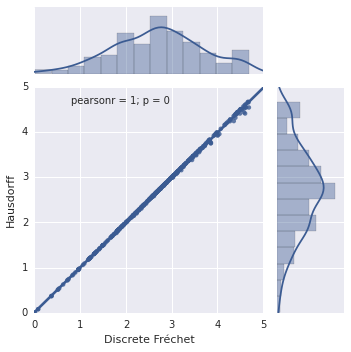

In [20]:
color = sns.xkcd_rgb["denim blue"]
with sns.axes_style("darkgrid"):
    g = sns.jointplot('Discrete Fréchet', 'Hausdorff', data=dframe, kind="reg",
                      ratio=3, xlim=(0,5), ylim=(0,5), color=color, size=5);
    savefig('plots/psa_correlation.svg', dpi=300)

In [111]:
import matplotlib as mpl

mpl.use('agg')
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=False)

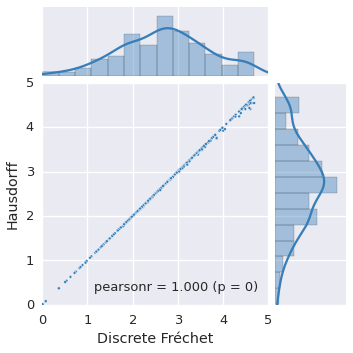

In [122]:
color = color_set1[1]
with sns.axes_style("darkgrid"):
    sns.set_context('talk')
    g = sns.JointGrid('Discrete Fréchet', 'Hausdorff', dframe, size=5,
                      ratio=3, space=0.1, xlim=(0,5), ylim=(0,5))
    g.plot_marginals(sns.distplot, kde=True, color=color)
    g.plot_joint(plt.scatter, color=color, edgecolor="white", s=8)
    g.annotate(stats.pearsonr, template="{stat} = {val:.3f} (p = {p:.3g})",
              loc=4);
    savefig('plots/psa_correlation.pdf', dpi=300)
    savefig('plots/psa_correlation.png', dpi=300)
    savefig('plots/psa_correlation.svg', dpi=300)

# ----------------------------------------------------

/nfs/homes/sseyler/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


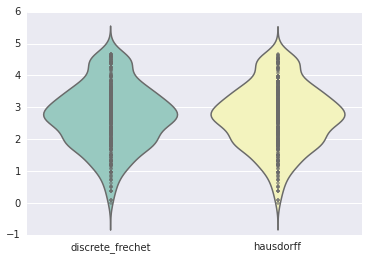

In [23]:
sns.violinplot(matrices, color="Set3", inner="points", names=used_metrics)

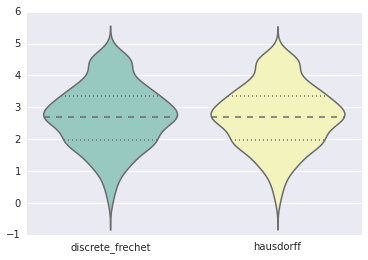

In [24]:
sns.violinplot(matrices, color="Set3", names=used_metrics)

In [80]:
color = sns.color_palette()[3]

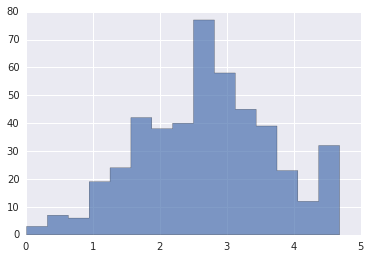

In [36]:
plt.hist(matrices[0], 15, histtype="stepfilled", alpha=.7);

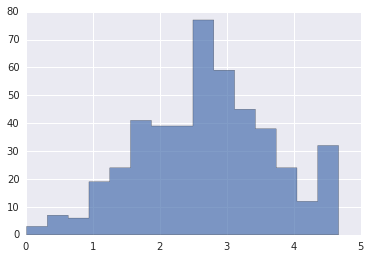

In [35]:
plt.hist(matrices[1], 15, histtype="stepfilled", alpha=.7);